<a href="https://colab.research.google.com/github/LouisPaul2000/ANN-FASHIONMNIST/blob/master/ANN%7CFASHIONMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras as kr
from keras.models import Sequential,Model,Input
from keras.layers import Reshape,Dense,Dropout,Conv2D,BatchNormalization,Flatten,Activation
from keras.activations import relu
import matplotlib.pyplot as plt
import numpy as np
from keras.optimizers import Adam
from keras.layers.advanced_activations import LeakyReLU
import random
from keras.utils import plot_model
from keras import regularizers
from matplotlib import pyplot
from keras.datasets import fashion_mnist
import numpy as np


In [ ]:
num_classes=10
epochs=25
batch_size=32

In [ ]:
(xtrain,ytrain),(xtest,ytest) = fashion_mnist.load_data()


In [ ]:
xtrain.shape

(60000, 28, 28)

In [ ]:
xtest.shape

(10000, 28, 28)

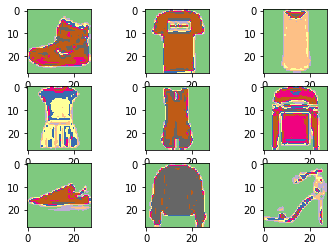

In [ ]:

for i in range(9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(xtrain[i], cmap=pyplot.get_cmap('Accent'))
pyplot.show()

In [ ]:
ytrain

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
xtrain=xtrain.reshape(60000,784)
xtest=xtest.reshape(10000,784)

In [ ]:
xtrain=xtrain.astype("float32")
xtest=xtest.astype("float32")

In [ ]:
ytrain=kr.utils.to_categorical(ytrain)
ytest=kr.utils.to_categorical(ytest)

In [ ]:
xtrain

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
ytrain

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
ytrain.shape

(60000, 10)

In [ ]:
model  = kr.models.Sequential()#Dangling pointer
model.add(kr.layers.Dense(512 ,activation="sigmoid" , input_shape=(784,)))
model.add(kr.layers.Dense(512 , activation="sigmoid" ))
model.add(kr.layers.Dense(10, activation="softmax" ))



In [ ]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_27 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_28 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
hist=model.fit(xtrain , ytrain , epochs=epochs , batch_size=batch_size )

Epoch 1/25
60000/60000 [==============================] - 20s 329us/step - loss: 0.8270 - accuracy: 0.6826
Epoch 2/25
60000/60000 [==============================] - 20s 326us/step - loss: 0.7668 - accuracy: 0.7017
Epoch 3/25
60000/60000 [==============================] - 19s 322us/step - loss: 0.7335 - accuracy: 0.7134
Epoch 4/25
60000/60000 [==============================] - 19s 324us/step - loss: 0.7180 - accuracy: 0.7128
Epoch 5/25
60000/60000 [==============================] - 19s 324us/step - loss: 0.6831 - accuracy: 0.7254
Epoch 6/25
60000/60000 [==============================] - 19s 325us/step - loss: 0.6862 - accuracy: 0.7246
Epoch 7/25
60000/60000 [==============================] - 19s 323us/step - loss: 0.6758 - accuracy: 0.7282
Epoch 8/25
60000/60000 [==============================] - 20s 326us/step - loss: 0.6538 - accuracy: 0.7407
Epoch 9/25
60000/60000 [==============================] - 20s 333us/step - loss: 0.6513 - accuracy: 0.7403
Epoch 10/25
60000/60000 [============

In [ ]:
model.save("model.h5")


In [ ]:
model.load_weights("model.h5")


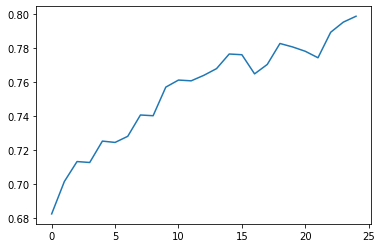

In [ ]:
plt.plot(hist.history["accuracy"])


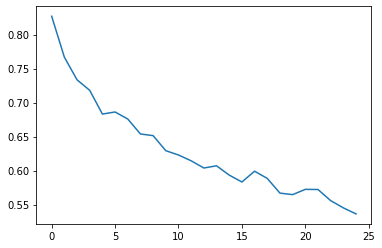

In [ ]:
plt.plot(hist.history["loss"])

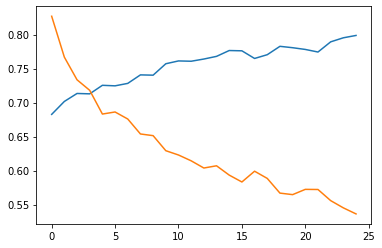

In [ ]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["loss"])
